In [1]:
import geopandas as gpd
import shapely
import numpy as np
import pandas as pd
import classes.entropycalculator as ec

import matplotlib.pyplot as plt

wijken = gpd.read_parquet("data/wijken_entropy.parquet")
wijken.head(3)

,wijkcode,wijknaam,gemeentecode,gemeentenaam,IND_WBI,H2O,OAD,STED,BEV_DICHTH,AANT_INW,...,L1_shannon_1,total_amenities_2,L0_shannon_2,L1_shannon_2,L0_altieri_0,L1_altieri_0,L0_altieri_1,L1_altieri_1,L0_altieri_2,L1_altieri_2
0,WK001400,Centrum,GM0014,Groningen,1.0,NEE,6647.0,1.0,10132.0,23150.0,...,4.230586,1165.0,2.364131,3.985634,5.932263,8.998993,4.691622,8.686294,4.899143,8.076450
1,WK001401,Oud-Zuid,GM0014,Groningen,3.0,NEE,4222.0,1.0,5212.0,21190.0,...,4.520878,222.0,2.952971,4.335505,5.168284,6.865884,5.803714,8.874531,5.834445,8.482511
2,WK001402,Oud-West,GM0014,Groningen,1.0,NEE,5535.0,1.0,12589.0,14155.0,...,4.203015,127.0,2.830858,3.991242,6.457507,8.932216,5.705231,8.636997,5.737152,8.226617


In [2]:
wijk1 = wijken[wijken["wijkcode"] == "WK077271"]
# wijk2 = wijken[wijken["wijkcode"] == "WK059924"]


# wijk1 = wijken[wijken["wijkcode"] == "WK158601"]
wijk2 = wijken[wijken["wijkcode"] == "WK158601"]

amenities_1 = gpd.read_parquet(f"data/gm_amenities/amenities_{wijk1.gemeentenaam.values[0]}.parquet")
amenities_1 = amenities_1[amenities_1.within(wijk1.geometry.iloc[0])]
amenities_2 = gpd.read_parquet(f"data/gm_amenities/amenities_{wijk2.gemeentenaam.values[0]}.parquet")
amenities_2 = amenities_2[amenities_2.within(wijk2.geometry.iloc[0])]

b1_outer, b1_inner = ec.return_buildings(wijk1.geometry.iloc[0])
b2_outer, b2_inner = ec.return_buildings(wijk2.geometry.iloc[0])

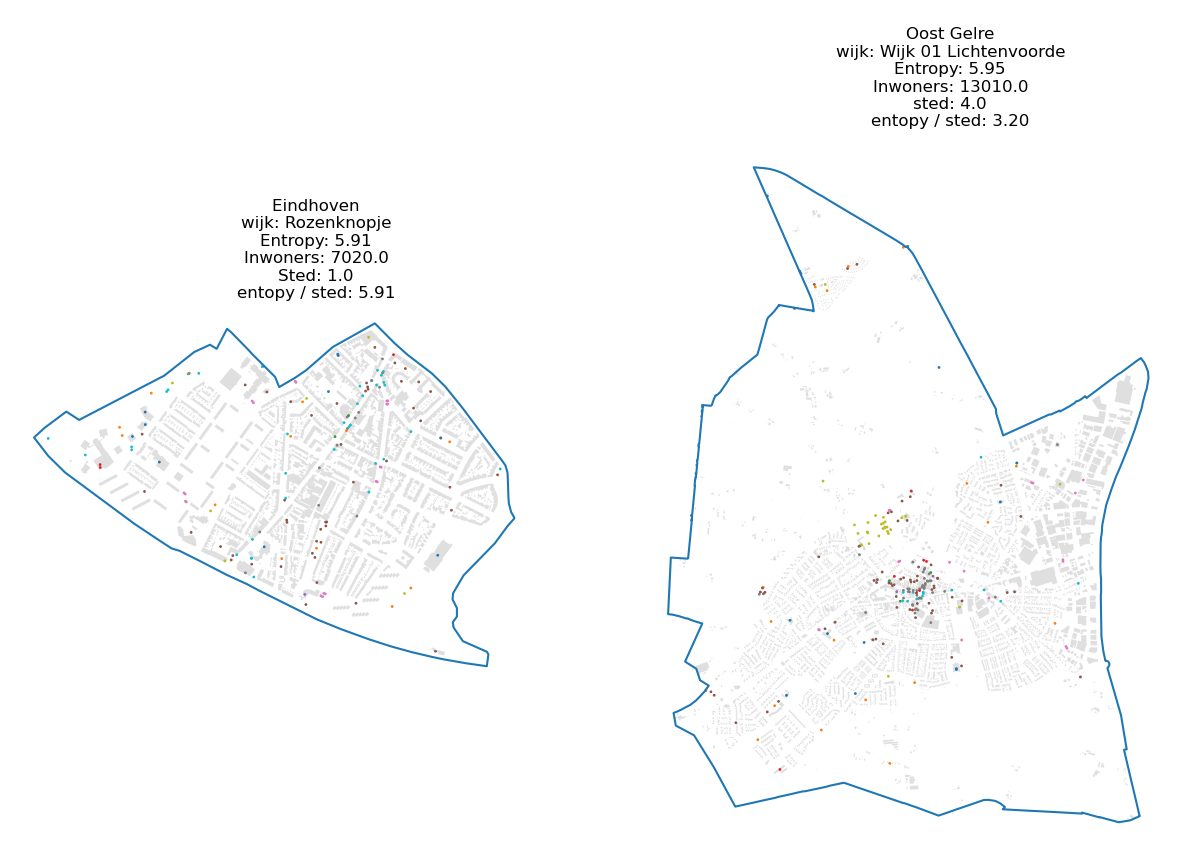

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

# b1_outer.plot(ax=ax[0], color="black", alpha=0.5)
b1_inner.plot(ax=ax[0], color="silver", alpha=0.5)
wijk1.boundary.plot(ax=ax[0])
amenities_1.plot(ax=ax[0], column="L0_category", markersize=1)


entropy = wijk1.L0_altieri_1.values[0]
entropy_sted = entropy / (np.emath.logn(5, wijk1.STED.values[0]) + 1)
ax[0].set_title(f"""
                {wijk1.gemeentenaam.values[0]}
                wijk: {wijk1.wijknaam.values[0]}
                Entropy: {entropy:.2f}
                Inwoners: {wijk1.AANT_INW.values[0]}
                Sted: {wijk1.STED.values[0]}
                entopy / sted: {entropy_sted:.2f}""")


# b2_outer.plot(ax=ax[1], color="black", alpha=0.5)
b2_inner.plot(ax=ax[1], color="silver", alpha=0.5)
wijk2.boundary.plot(ax=ax[1])
amenities_2.plot(ax=ax[1], column="L0_category", markersize=1) 

entropy = wijk2.L0_altieri_1.values[0]

entropy_sted = entropy / (np.emath.logn(5, wijk2.STED.values[0]) + 1) 

ax[1].set_title(f"""
                {wijk2.gemeentenaam.values[0]}
                wijk: {wijk2.wijknaam.values[0]}
                Entropy: {entropy:.2f}
                Inwoners: {wijk2.AANT_INW.values[0]}
                sted: {wijk2.STED.values[0]}
                entopy / sted: {entropy_sted:.2f}""")

# no axes
for a in ax:
    a.set_axis_off()

WK077271


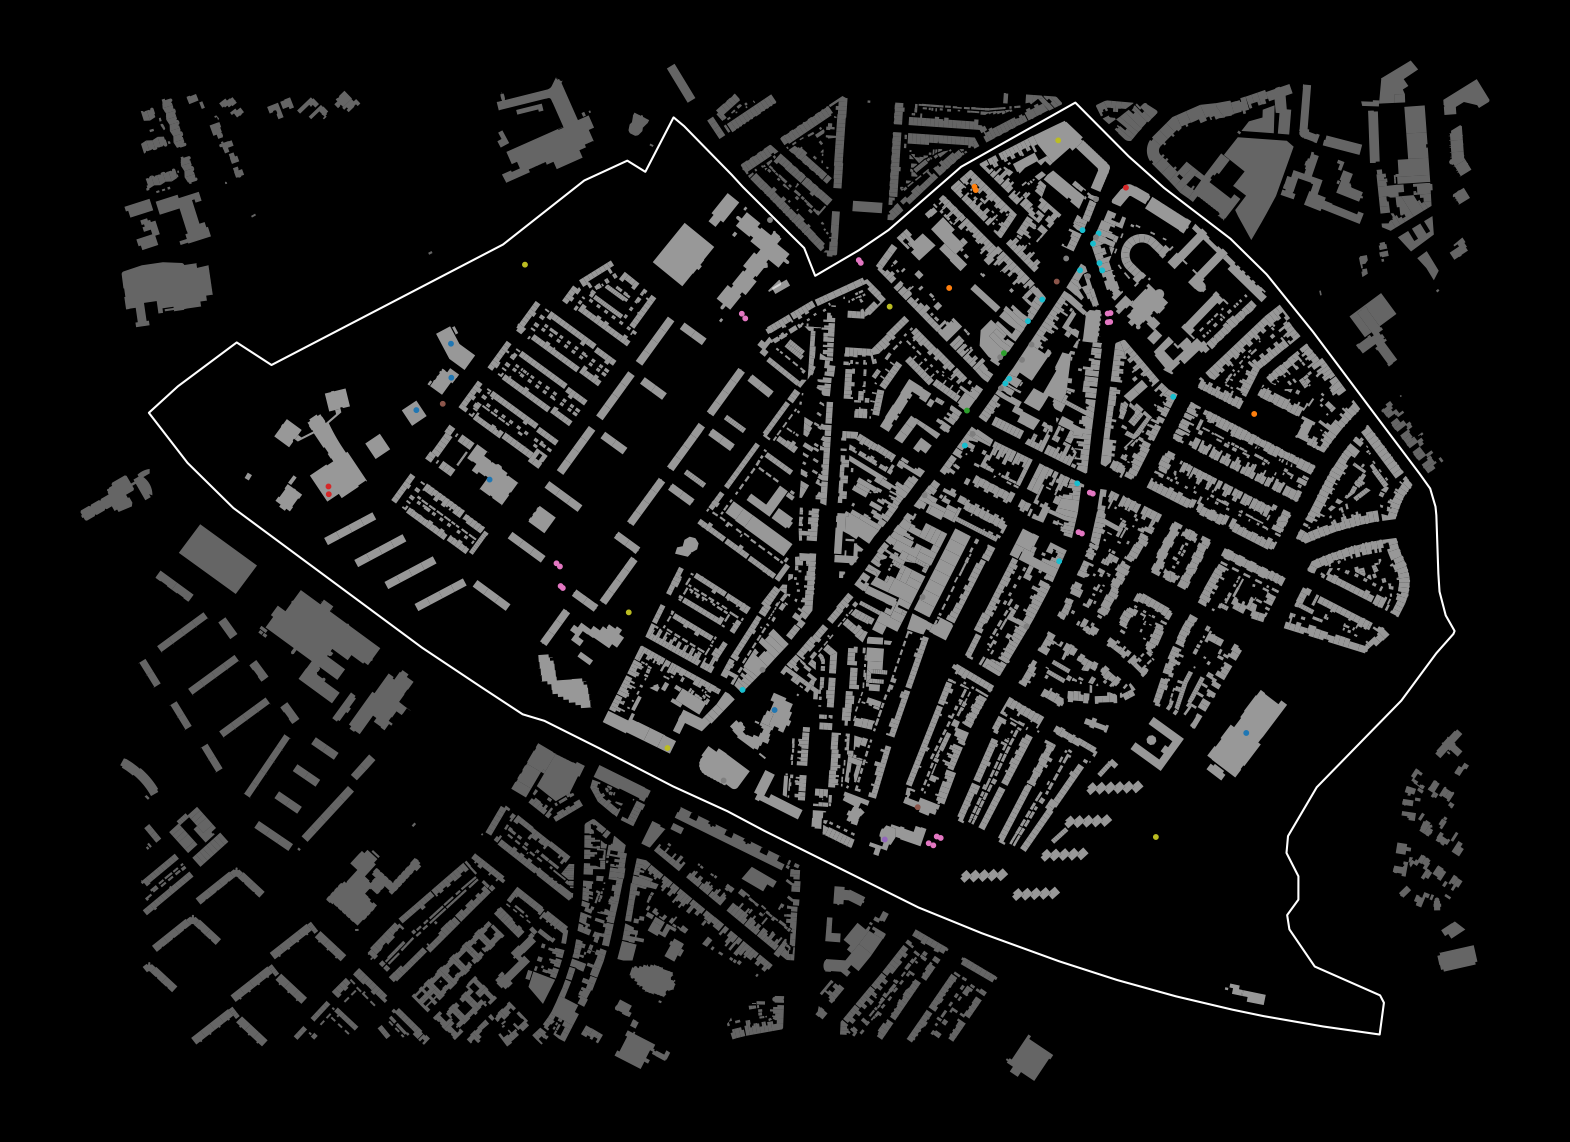

In [4]:
L0_filter, L1_filter = ec.getfilter(1)

for _, wijk in wijken[wijken["wijknaam"] == "Rozenknopje"].iterrows():
    print(wijk.wijkcode)
    wijk = wijken[wijken["wijkcode"] == wijk.wijkcode]
    amenities_1 = gpd.read_parquet(f"data/gm_amenities/amenities_{wijk.gemeentenaam.values[0]}.parquet")
    amenities_1 = amenities_1[amenities_1.within(wijk.geometry.iloc[0])]
    amenities_1 = amenities_1[~amenities_1.L0_category.isin(L0_filter)]
    if L1_filter:
        for key, value in L1_filter.items():
            amenities_1 = amenities_1[~((amenities_1.L0_category == key) & (amenities_1.L1_category.isin(value)))]

    b1_outer, b1_inner = ec.return_buildings(wijk.geometry.iloc[0])
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    
    b1_outer.plot(ax=ax, color="white", alpha=0.4, linewidth=0.5)
    b1_inner.plot(ax=ax, color="white", alpha=0.6, linewidth=0.5)
    wijk.boundary.plot(ax=ax, color="White")
    
    amenities_1.plot(ax=ax, column="L0_category", markersize=10, legend=False)

    ax.axis("off")

    
    fig.set_facecolor("black")
 
    # ax.set_title(f"{wijk.gemeentenaam.values[0]} \n Entropy: {entropy:.2f}")

C:\Users\joepl\AppData\Local\Temp\ipykernel_25540\1466994052.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sample_2 = sample_2.set_geometry(sample_2.geometry.translate(xoff=sample_1.geometry.centroid.x.values[0] - sample_2.geometry.centroid.x.values[0],
C:\Users\joepl\AppData\Local\Temp\ipykernel_25540\1466994052.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  yoff=sample_1.geometry.centroid.y.values[0] - sample_2.geometry.centroid.y.values[0]))


<Axes: >

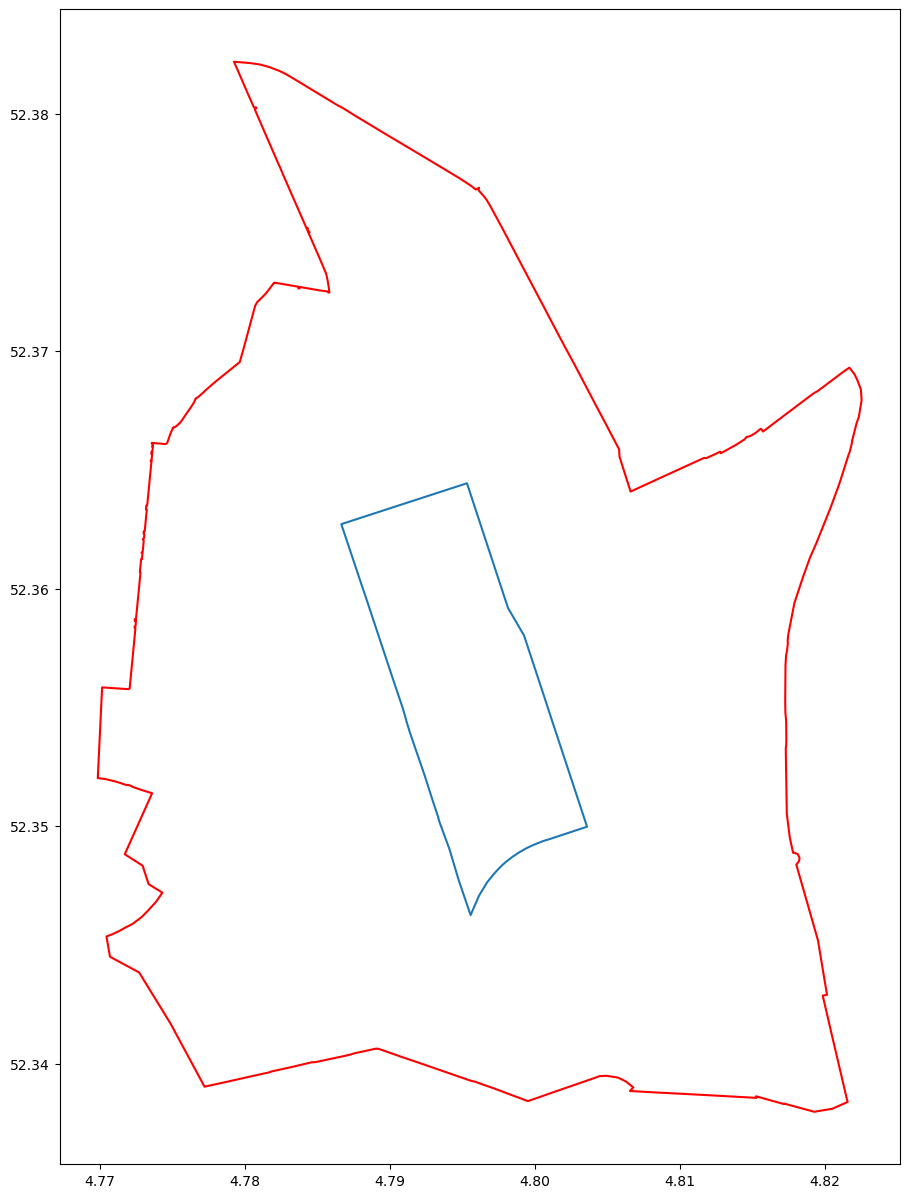

In [5]:
sample_1 = wijken.sample(1)
sample_1 = wijken[wijken["wijkcode"] == "WK0363FJ"]

sample_2 = wijken.sample(1)
sample_2 = wijken[wijken["wijkcode"] == "WK158601"]

# transform sample_2 on top of sample_1
sample_2 = sample_2.to_crs(sample_1.crs)
sample_2 = sample_2.set_geometry(sample_2.geometry.translate(xoff=sample_1.geometry.centroid.x.values[0] - sample_2.geometry.centroid.x.values[0], 
                                                             yoff=sample_1.geometry.centroid.y.values[0] - sample_2.geometry.centroid.y.values[0]))

sample_1 = sample_1.to_crs(epsg=4326)
sample_2 = sample_2.to_crs(epsg=4326)

# plot boundaries
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sample_1.boundary.plot(ax=ax)
sample_2.boundary.plot(ax=ax, color="red")



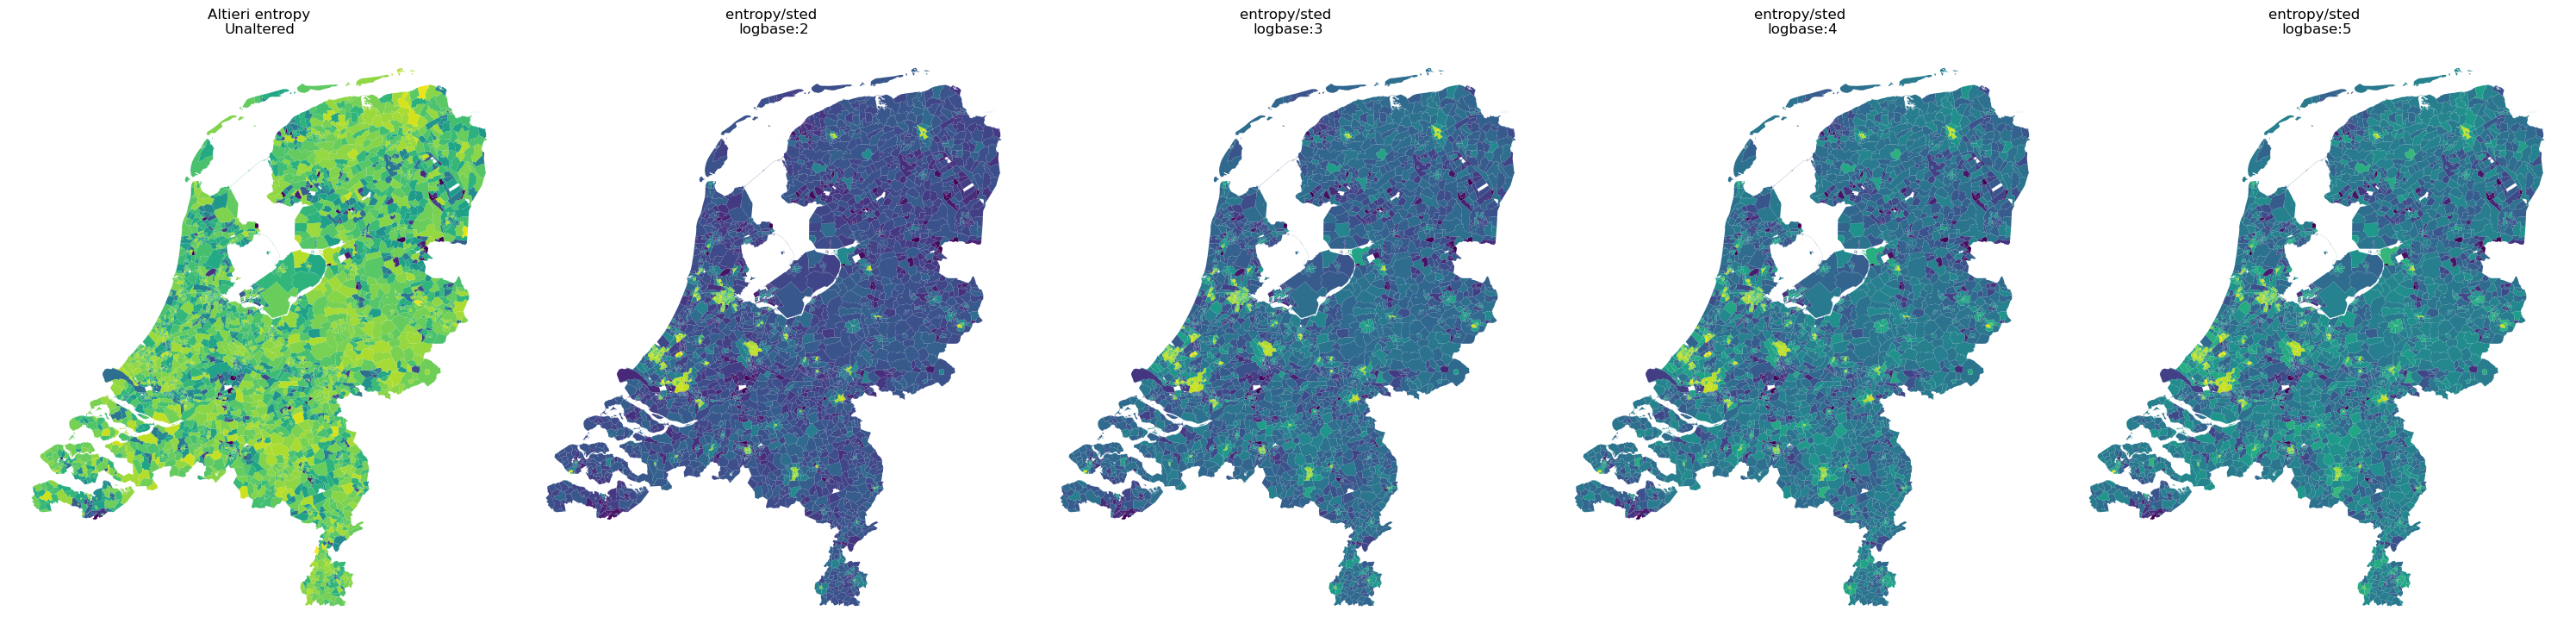

In [6]:
wijken.loc[:, 'sted/entropy'] = wijken.L0_altieri_1 / (np.emath.logn(5, wijken.STED) + 1)
wijken.to_parquet("data/wijken_stedent.parquet")

fig, axs = plt.subplots(1, 5, figsize=(30, 30))

wijken.plot(column="L0_altieri_1", legend=False, ax=axs[0])
axs[0].set_title("Altieri entropy\nUnaltered")


for i in range(2, 6):
    wijken.loc[:, 'sted/entropy'] = wijken.L0_altieri_1 / (np.emath.logn(i, wijken.STED) + 1)
    wijken.plot(column='sted/entropy', ax=axs[i-1])
    axs[i-1].set_title(f"entropy/sted \nlogbase:{i}")
    
# no axes
for a in axs.flatten():
    a.set_axis_off()
plt.tight_layout()


In [7]:
wijken = gpd.read_parquet("data/wijken_stedent.parquet")

import plotly.colors as pc
def get_color_from_colorscale(value, colorscale, vmin=0, vmax=1):
    """
    Returns the color from a Plotly colorscale based on the input value.

    Parameters:
    - value: The input value for which the color needs to be found.
    - colorscale: A Plotly colorscale (list of [value, color] pairs).
    - vmin: Minimum value of the input range (default is 0).
    - vmax: Maximum value of the input range (default is 1).

    Returns:
    - color: The color corresponding to the input value in the colorscale.
    """
    
    
    # Normalize the value to be within [0, 1]
    norm_value = (value - vmin) / (vmax - vmin)
    norm_value = min(max(norm_value, 0), 1)  # Ensure the value is within [0, 1]
    
    len_colorscale = len(colorscale)
    cutoffs = np.linspace(0, 1, len_colorscale)
    
    lowcolor = None
    highcolor = None
    # find the two closest cutoffs
    for i in range(len_colorscale):
        if cutoffs[i] <= norm_value <= cutoffs[i + 1]:
            lowcolor = colorscale[i]
            highcolor = colorscale[i + 1]
            break
        
    # Use the get_continuous_color function to get the color
    color = pc.find_intermediate_color(
        lowcolor=lowcolor,
        highcolor=highcolor,
        intermed=norm_value,
        colortype='rgb'
    )

    return color

vmin = wijken["sted/entropy"].min()
vmax = wijken["sted/entropy"].max()

colorscale = pc.sequential.YlGn

# wijken.loc[:, "color"] = wijken.loc[:, "sted/entropy"].apply(lambda x: get_color_from_colorscale(x, colorscale, 0, vmax))



wijken

,wijkcode,wijknaam,gemeentecode,gemeentenaam,IND_WBI,H2O,OAD,STED,BEV_DICHTH,AANT_INW,...,total_amenities_2,L0_shannon_2,L1_shannon_2,L0_altieri_0,L1_altieri_0,L0_altieri_1,L1_altieri_1,L0_altieri_2,L1_altieri_2,sted/entropy
0,WK001400,Centrum,GM0014,Groningen,1.0,NEE,6647.0,1.0,10132.0,23150.0,...,1165.0,2.364131,3.985634,5.932263,8.998993,4.691622,8.686294,4.899143,8.076450,4.691622
1,WK001401,Oud-Zuid,GM0014,Groningen,3.0,NEE,4222.0,1.0,5212.0,21190.0,...,222.0,2.952971,4.335505,5.168284,6.865884,5.803714,8.874531,5.834445,8.482511,5.803714
2,WK001402,Oud-West,GM0014,Groningen,1.0,NEE,5535.0,1.0,12589.0,14155.0,...,127.0,2.830858,3.991242,6.457507,8.932216,5.705231,8.636997,5.737152,8.226617,5.705231
3,WK001403,Oud-Noord,GM0014,Groningen,1.0,NEE,5250.0,1.0,10301.0,18300.0,...,171.0,2.948448,4.171525,6.652145,8.756814,6.051625,8.774843,6.011776,8.251019,6.051625
4,WK001404,Oosterparkwijk,GM0014,Groningen,1.0,NEE,4369.0,1.0,8552.0,12700.0,...,94.0,2.951453,3.963856,6.635238,8.616541,5.754854,8.184486,5.889533,7.875053,5.754854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3319,WK199221,Oostvoorne,GM1992,Voorne aan Zee,2.0,NEE,671.0,4.0,352.0,8390.0,...,164.0,2.831224,3.820267,5.719134,7.192536,5.667246,7.564540,5.556188,7.233472,3.044692
3320,WK199230,Brielle,GM1992,Voorne aan Zee,2.0,NEE,1111.0,3.0,1817.0,14090.0,...,193.0,2.739970,3.719156,5.961653,7.463447,5.282742,7.246300,5.310224,6.698404,3.139619
3321,WK199231,Vierpolders,GM1992,Voorne aan Zee,2.0,NEE,256.0,5.0,188.0,1870.0,...,55.0,2.356782,2.840601,5.489273,6.747613,4.626963,5.570646,4.616474,5.438184,2.313482
3322,WK199232,Zwartewaal,GM1992,Voorne aan Zee,2.0,NEE,254.0,5.0,221.0,1920.0,...,31.0,2.248385,2.943271,4.857660,5.919114,4.207510,5.455513,4.207510,5.455513,2.103755
